In [1]:
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#import 2022-04-20.csv from data folder
df = pd.read_csv('data/2022-04-20.csv')
#replace all NaN values with 0
df = df.fillna(0)
#drop World row
df=df.drop(0)
df=df.sort_values(by=['Active Cases'], ascending=False)
df.dtypes

Unnamed: 0           int64
Country             object
Total Cases          int64
New Cases            int64
Total Deaths         int64
New Deaths           int64
Total Recovered    float64
New Recovered      float64
Active Cases       float64
Serious              int64
Tot per 1M           int64
Deaths per 1M      float64
Tests                int64
Tests per 1M         int64
Pop                  int64
dtype: object

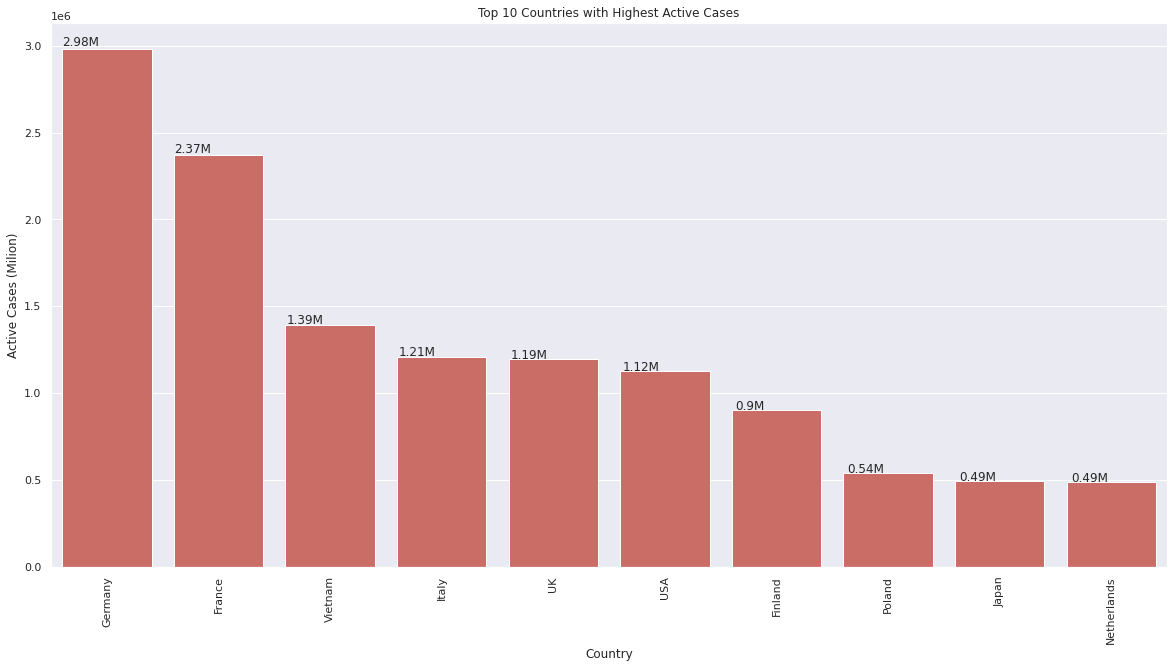

In [3]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="Country", y="Active Cases", data=df.head(10),palette=sns.color_palette("hls", 1))
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Highest Active Cases')
plt.ylabel('Active Cases (Milion)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height()/1e6,2))+"M", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

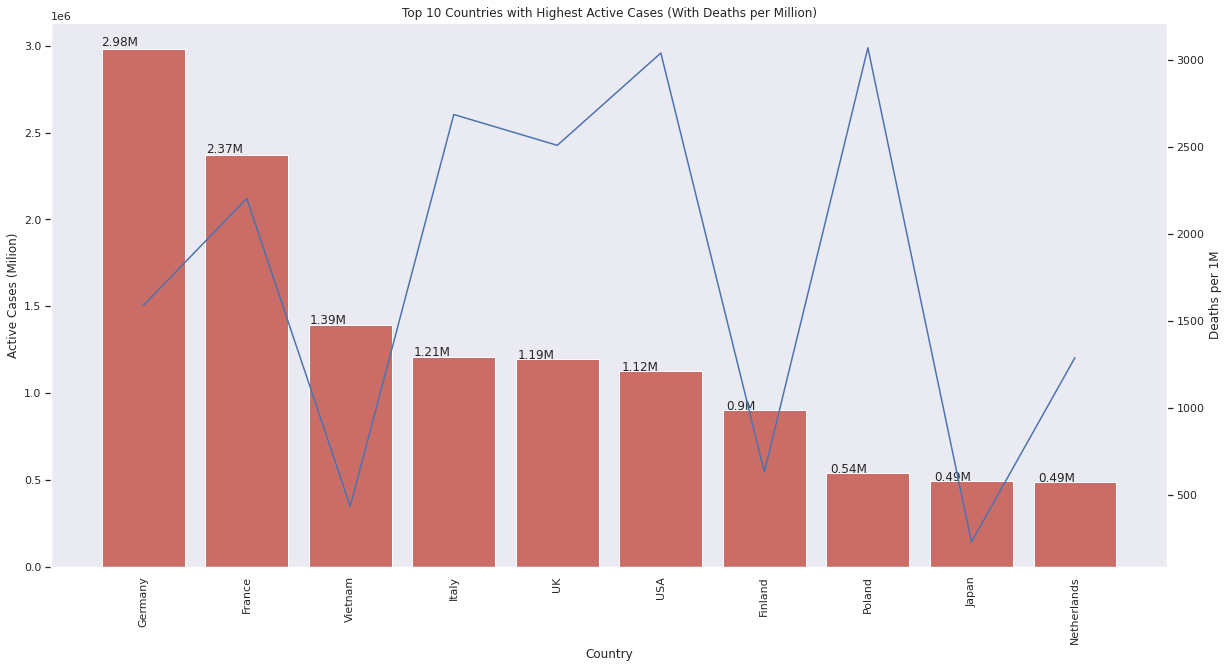

In [5]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="Country", y="Active Cases", data=df.head(10),palette=sns.color_palette("hls", 1))
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Highest Active Cases (With Deaths per Million)')
plt.ylabel('Active Cases (Milion)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height()/1e6,2))+"M", (p.get_x() * 1.005, p.get_height() * 1.005))
ax2=ax.twinx()
sns.lineplot(data=df.head(10),x="Country", y="Deaths per 1M",ax=ax2,palette=sns.color_palette("hls", 1))
ax.grid(False)
ax2.grid(False)
plt.show()

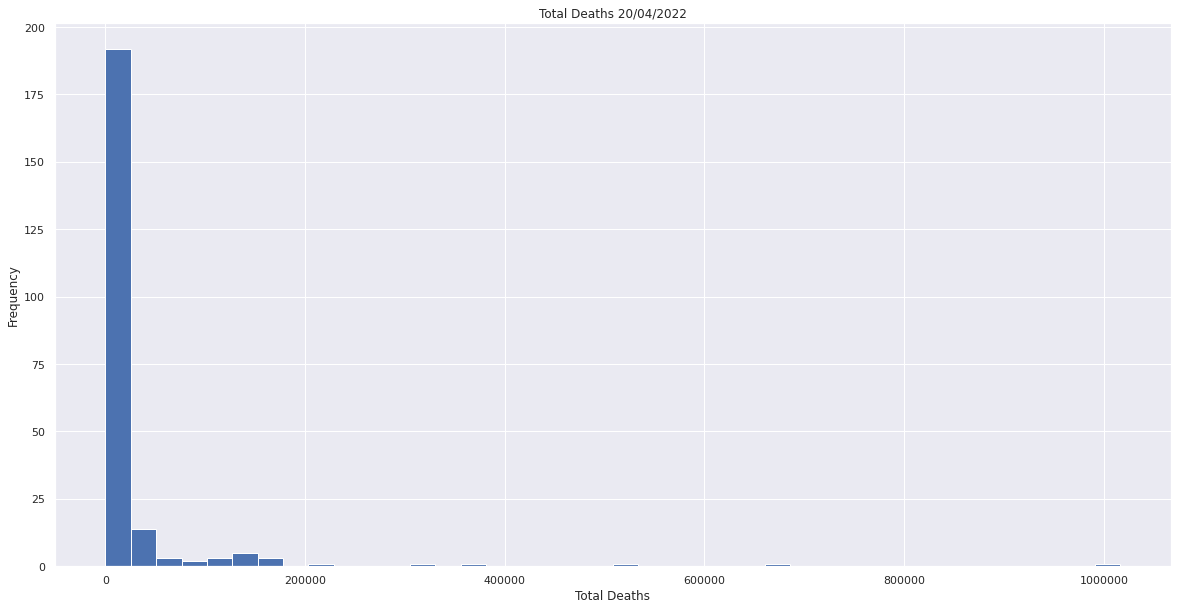

In [7]:
plt.ticklabel_format(style='plain')
plt.hist(df['Total Deaths'], bins=40)
plt.title('Total Deaths 20/04/2022')
plt.ylabel('Frequency')
plt.xlabel('Total Deaths')
plt.show()

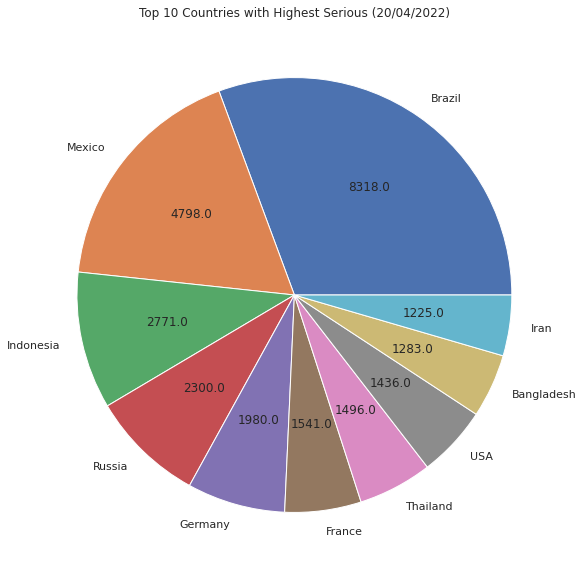

In [8]:
df=df.sort_values(by=['Serious'], ascending=False)
data=df.head(10)

def absolute_value(val):
    a  = np.round(val/100*data['Serious'].sum(), 0)
    return a
    
plt.title('Top 10 Countries with Highest Serious (20/04/2022)')
plt.pie(data['Serious'], labels = data['Country'],autopct=absolute_value)
plt.show()

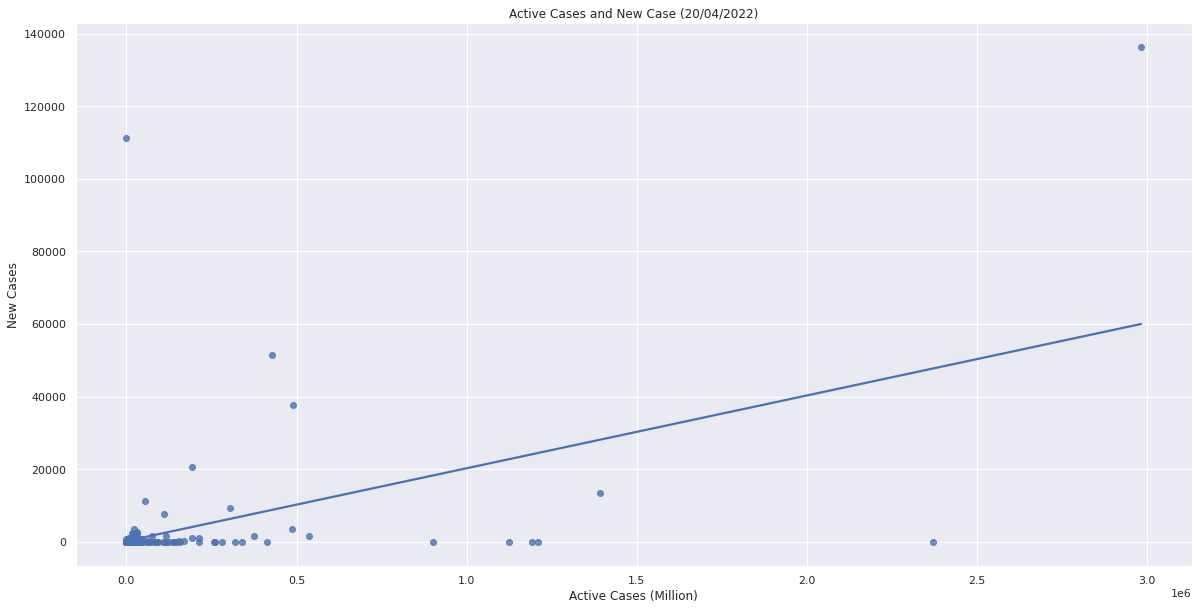

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(x = "Active Cases", y = "New Cases", data= df, ci = None)
plt.title('Active Cases and New Case (20/04/2022)') 
plt.xlabel('Active Cases (Million)')
plt.show()

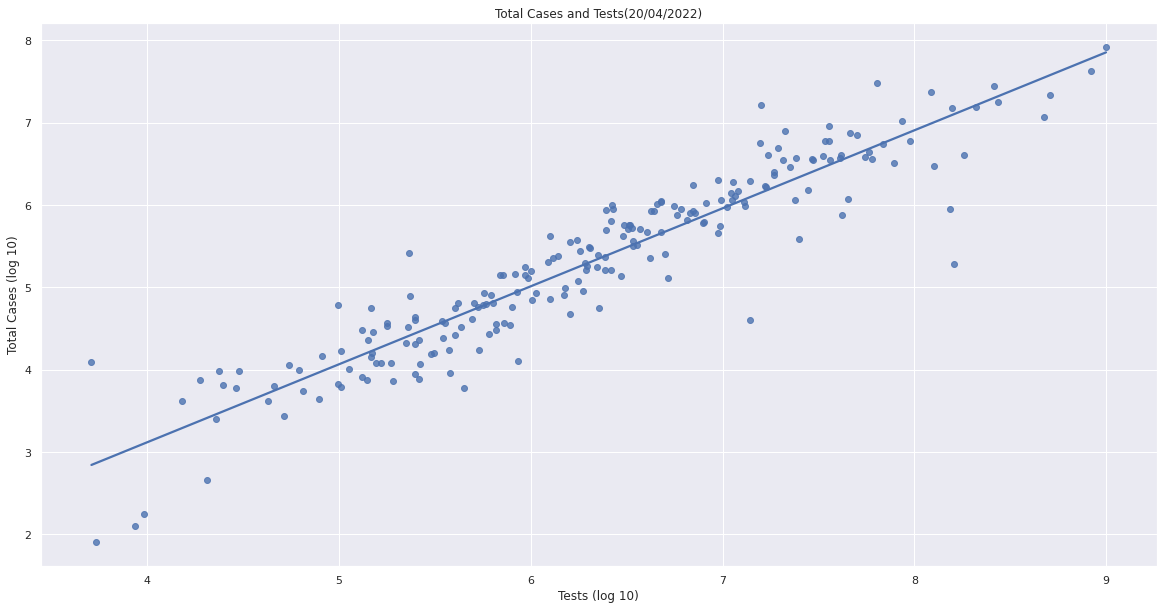

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
df1=df[df['Active Cases']>0]
df2=df[df['Tests']>0]
sns.regplot(x = np.log10(df2["Tests"]), y=np.log10(df2[ "Total Cases"]), ci = None)
plt.title('Total Cases and Tests(20/04/2022)') 
plt.xlabel('Tests (log 10)')
plt.ylabel('Total Cases (log 10)') 
plt.show()

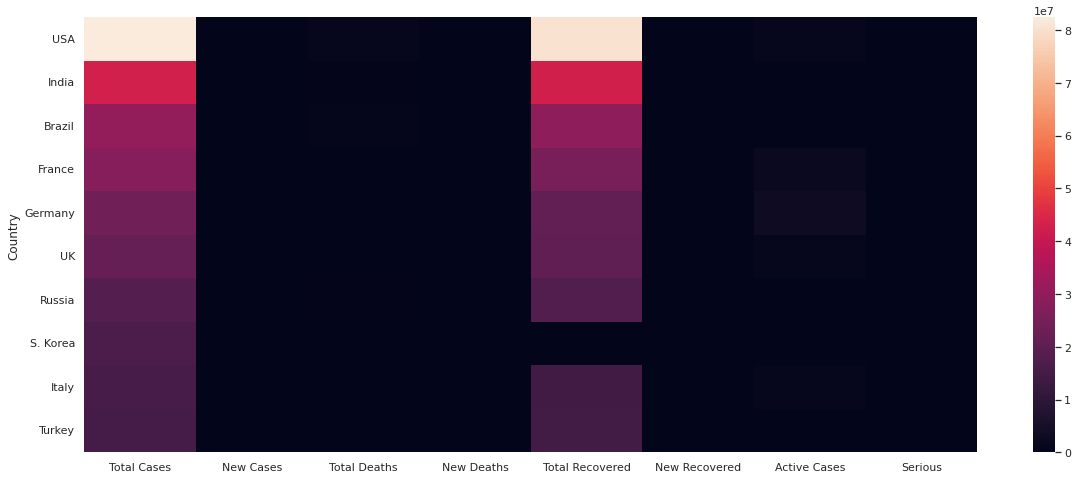

In [28]:
df = df.sort_values(by=['Total Cases'], ascending=False)
df_t = df.head(10).loc[:,["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious"]]
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(df_t.set_index('Country'));